# Chapter 7 Exercises

Use the stock_analysis package to complete the following exercises. Unless
otherwise noted, use data from 2017 through to the end of 2018

In [50]:
import stock_analysis
import pandas as pd

reader = stock_analysis.StockReader('2017-01-01', '2018-12-31')

# get bitcoin data
#bitcoin = reader.get_bitcoin_data() #only works when currency_code = 'USD' is given!
bitcoin = pd.read_csv('data/bitcoin.csv', index_col = 'date', parse_dates = True)

# get faang data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker) \
    for ticker in ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data(index = 'SP500') #only works when index = 'S&P 500' is given!
#sp = pd.read_csv('data/sp500.csv', index_col = 'date', parse_dates = True)

1. Using the StockAnalyzer, calculate and plot three levels of support and
resistance for Netflix's closing price from 2017-2018.

In [53]:
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
nflx_analyzer.support()

261.740000406901

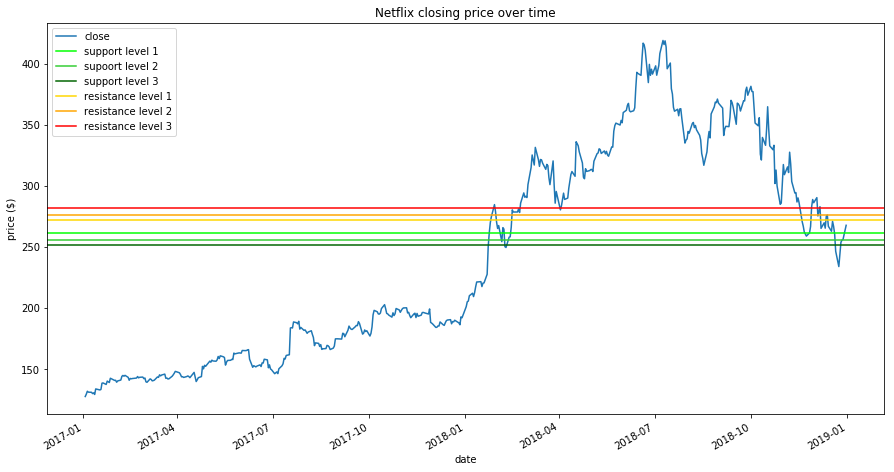

In [58]:
ax = stock_analysis.StockVisualizer(nflx).evolution_over_time(
    'close', 
    figsize=(15, 8), 
    legend=False, 
    title='Netflix closing price over time'
)

ref_lines = [
    (nflx_analyzer.support(level = 1), 0, 1, 'lime', 'support level 1'),
    (nflx_analyzer.support(level = 2), 0, 1, 'limegreen', 'supoort level 2'),
    (nflx_analyzer.support(level = 3), 0, 1, 'darkgreen', 'support level 3'),
    (nflx_analyzer.resistance(level = 1), 0, 1, 'gold', 'resistance level 1'),
    (nflx_analyzer.resistance(level = 2), 0, 1, 'orange', 'resistance level 2'),
    (nflx_analyzer.resistance(level = 3), 0, 1, 'red', 'resistance level 3')
]

for y, xmin, xmax, color, label in ref_lines:
    ax.axhline(y, xmin, xmax, color=color, label=label)

ax.set_ylabel('price ($)')
ax.legend()

2. With the StockVisualizer, look at the effect of after-hours trading on the
FAANG stocks:
    * As individual stocks
    * As a portfolio using the make_portfolio() function from
stock_analysis.utils

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bdbd9ef10>,
      dtype=object)

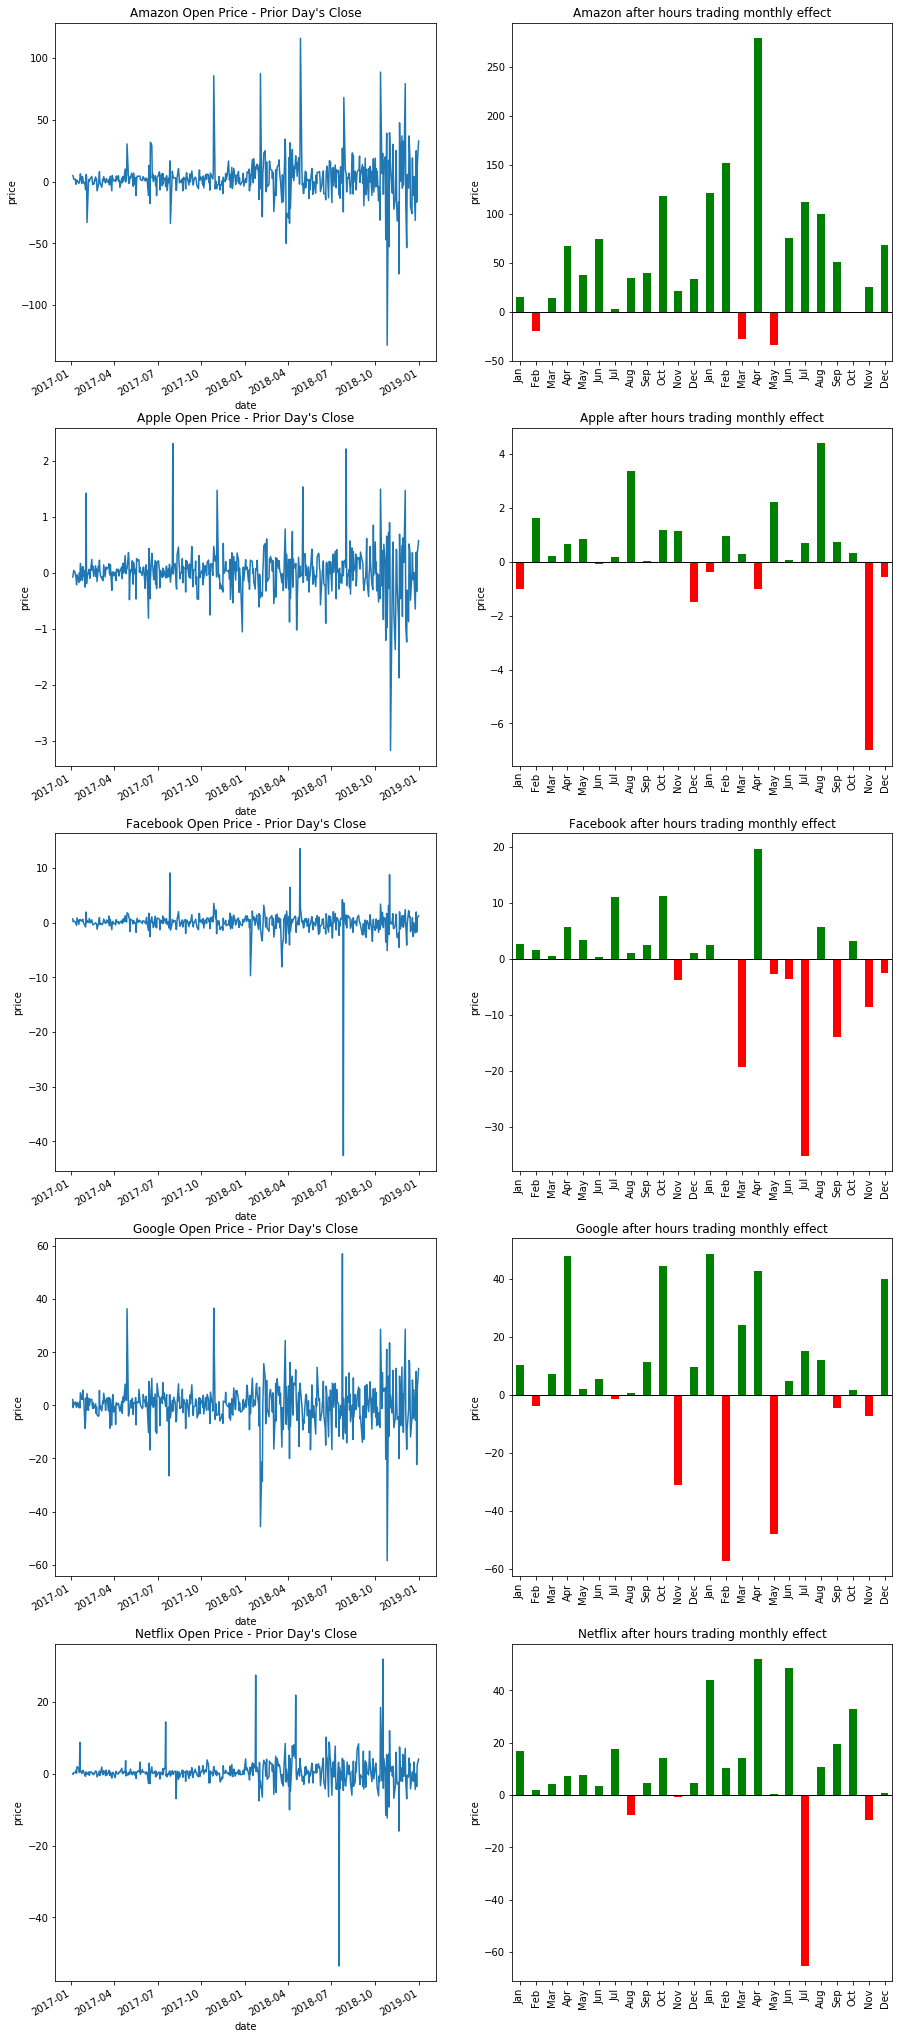

In [44]:
#As individual stocks
from stock_analysis.utils import group_stocks

faang = group_stocks(
    {
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog
    }
)

faang_viz = stock_analysis.AssetGroupVisualizer(faang)
faang_viz.after_hours_trades()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bd910bf50>,
      dtype=object)

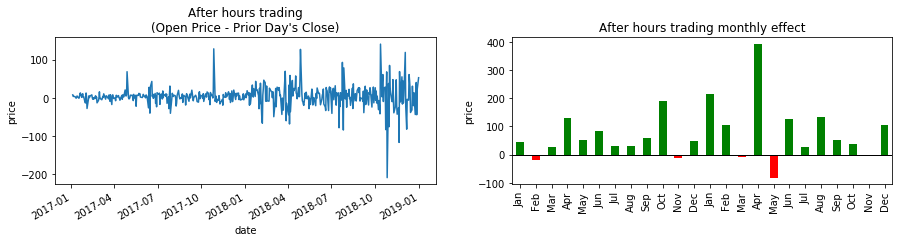

In [45]:
#As a portfolio using the make_portfolio() function from stock_analysis.utils
from stock_analysis.utils import make_portfolio

faang_portfolio = make_portfolio(faang)
portfolio_viz = stock_analysis.StockVisualizer(faang_portfolio)
portfolio_viz.after_hours_trades()

3. Using the StockVisualizer.open_to_close() method, create a plot
that fills the area between the FAANG stocks' opening price (as a
portfolio) and its closing price each day in red if the price declined and in
green if the price increased. As a bonus, do the same for a portfolio of
bitcoin and the S&P 500.

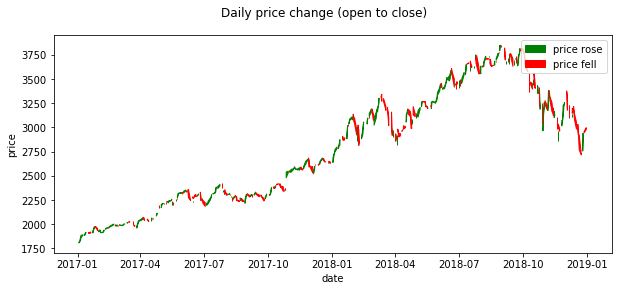

In [46]:
portfolio_viz.open_to_close()

In [12]:
bit_sp = group_stocks(
    {
        'Bitcoin' : bitcoin,
        'S&P 500' : sp
    }
)
bit_sp_portfolio = make_portfolio(bit_sp)
portfolio_viz_2 = stock_analysis.StockVisualizer(bit_sp_portfolio)

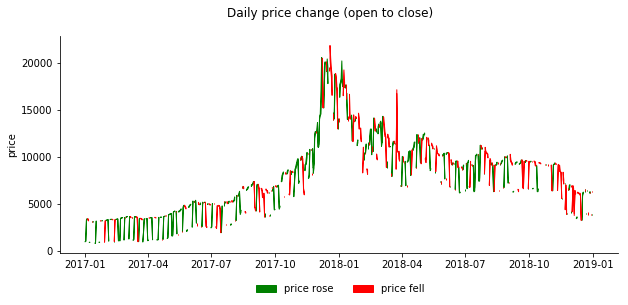

In [13]:
portfolio_viz_2.open_to_close()

4. Mutual funds and exchange-traded funds (ETFs) are funds that are
composed of many assets. They are built to mitigate risk, so volatility for
the fund will be lower than that of the assets that compose it. Information
on how they differ can be found at https:/​ / ​ www.​ investopedia.​ com/
articles/​ exchangetradedfunds/​ 08/​ etf-​ mutual-​ fund-​ difference.
asp . Compare a mutual fund or ETF of your choice to three of its largest
stocks (by composition) using annualized volatility and the
AssetGroupAnalyzer .

Note: Solution uses the mutual fund FBALX, whose composition can be found at https://fundresearch.fidelity.com/mutual-funds/composition/316345206. Composition used for the solution taken on April 14, 2019.

In [47]:
fbalx = reader.get_ticker_data('FBALX')
msft = reader.get_ticker_data('MSFT')
mutual_fund = group_stocks({
    '0 - FBALX' : fbalx,
    '1 - Microsoft' : msft,
    '2 - Apple' : aapl,
    '3 - Amazon' : amzn
})
stock_analysis.AssetGroupAnalyzer(mutual_fund).analyze(
    'annualized_volatility'
)

{'0 - FBALX': 0.13084907578280824,
 '1 - Microsoft': 0.2823678701754217,
 '2 - Apple': 0.28709412666171025,
 '3 - Amazon': 0.3606494363818415}

5. Write a function that returns a dataframe of one row with columns
for alpha , beta , annualized_volatility , is_bear_market , and
is_bull_market , which each contain the results of running the respective
methods on a given stock using the StockAnalyzer . Dictionary
comprehensions and the getattr() function, as used in the
AssetGroupAnalyzer.analyze() method, will be useful.

In [48]:
import pandas as pd

def metric_table(stock, index):
    """
    Make a table of metrics for a stock.

    Parameters:
        - stock: The stock's dataframe.
        - index: The dataframe for the index.
     
    Returns:
        A pandas DataFrame with a single row of metrics
    """
    return pd.DataFrame({
        metric : getattr(
            stock_analysis.StockAnalyzer(stock), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            'alpha' : {'index' : index, 'r_f' : 2.46}, 
            'beta' : {'index' : index}, 
            'annualized_volatility' : {},
            'is_bear_market' : {},
            'is_bull_market' : {}
        }.items()
    }, index=range(1))

metric_table(fbalx, sp)

,alpha,beta,annualized_volatility,is_bear_market,is_bull_market
0,-0.147329,0.632124,0.130849,False,False


My own example: plot residuals for decomposition model

Text(0.5, 1, 'Netflix Stock Price Time Series Decomposition')

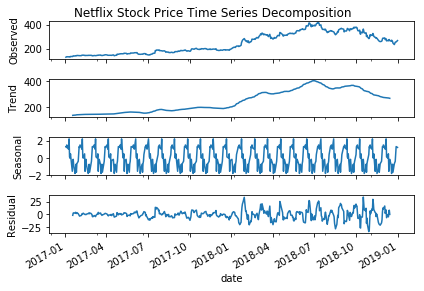

In [49]:
from stock_analysis import StockModeler
decomposition = StockModeler.decompose(nflx, 20)
fig = decomposition.plot()
fig.suptitle('Netflix Stock Price Time Series Decomposition', y=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bd993ebd0>,
      dtype=object)

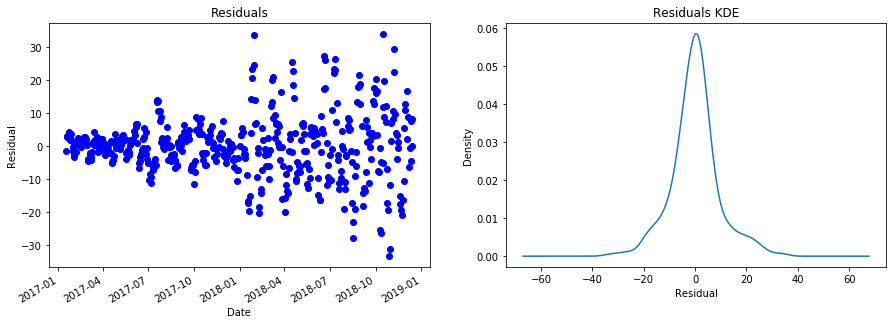

In [59]:
StockModeler.plot_residuals(decomposition)